(array([0.99999978, 0.99999955]), 51, 1)


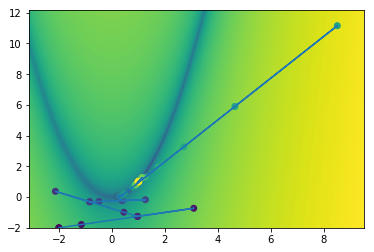

In [1]:
import scipy.optimize as opt
import numpy as np

points=[]
def obj_func(p):
    x,y=p
    z=(1-x)**2+100*(y-x**2)**2
    points.append((x,y,z))
    return z

#偏导数，有些优化方法用得到，有些用不到
def fprime(p):
    x,y=p
    dx=-2+2*x-400*x*(y-x**2)
    dy=200*y-200*x**2
    return np.array([dx,dy])
init_point=(-2,-2)

#这两种优化方法没用到偏导
#result=opt.fmin(obj_func,init_point)
#result=opt.fmin_powell(obj_func,init_point)

#用到偏导的：
#result=opt.fmin_cg(obj_func,init_point,fprime=fprime)
#result=opt.fmin_bfgs(obj_func,init_point,fprime=fprime)
result=opt.fmin_tnc(obj_func,init_point,fprime=fprime)
#result=opt.fmin_l_bfgs_b(obj_func,init_point,fprime=fprime)

#其它
#result=opt.fmin_cobyla(obj_func,init_point,[])
print(result)


### 绘图
import pylab as pl
p=np.array(points)
xmin,xmax=np.min(p[:,0])-1,np.max(p[:,0])+1
ymin,ymax=np.min(p[:,1]),np.max(p[:,1])+1
Y,X=np.ogrid[ymin:ymax:500j,xmin:xmax:500j]
Z=np.log10(obj_func((X,Y)))
zmin,zmax=np.min(Z),np.max(Z)

pl.imshow(Z,extent=(xmin,xmax,ymin,ymax),origin="bottom",aspect="auto")
pl.plot(p[:,0],p[:,1])
pl.scatter(p[:,0],p[:,1],c=range(len(p)))
pl.xlim(xmin,xmax)
pl.ylim(ymin,ymax)
pl.show()